<center>
    <h1>Cat vs Dog</h1>
    <h2>Student Project - Vahid Piroozbakht</h2>
    <h2>Deeplearning</h2>
</center>

<h2>1.Introduction:</h2>

In this project we will be solving the famous Kaggle Challenge “Dogs vs. Cats” using Convolutional Neural Network (CNN). We will be using TensorFlow.

At the end of this article, you will have a working model for the Kaggle challenge “Dogs vs. Cats”, classifying images as cats vs dog. Moreover, you will have a better understanding of how to choose the correct CNN architecture that works best for your task.

<h3>1.1 The Asirra data set</h3>
Web services are often protected with a challenge that's supposed to be easy for people to solve, but difficult for computers. Such a challenge is often called a CAPTCHA (Completely Automated Public Turing test to tell Computers and Humans Apart) or HIP (Human Interactive Proof). HIPs are used for many purposes, such as to reduce email and blog spam and prevent brute-force attacks on web site passwords.

Asirra (Animal Species Image Recognition for Restricting Access) is a HIP that works by asking users to identify photographs of cats and dogs. This task is difficult for computers, but studies have shown that people can accomplish it quickly and accurately. Many even think it's fun! Here is an example of the Asirra interface:

Asirra is unique because of its partnership with Petfinder.com, the world's largest site devoted to finding homes for homeless pets. They've provided Microsoft Research with over three million images of cats and dogs, manually classified by people at thousands of animal shelters across the United States. Kaggle is fortunate to offer a subset of this data for fun and research. (<a href='https://www.kaggle.com/c/dogs-vs-cats/overview'>Kaggle</a>)

<h2>2.Problem Formulation:</h2>
Our data set contents some image in 2 different category, cats and dogs. each image is one data point that has features (the pixels). <br>
The images are store in 3 folders, (Train,Val,Test) and each folder has 2 sub folder (Cat,Dog).

<img src='path.png'/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

from data_utils import import_images

In [4]:
CATEGORIES=['Cat', 'Dog']

<h3>2.1.Reading data</h3>
For reading data we defined a function, called <i><b>import_images()</b></i> in this function, first define 3 sets to Store images in related dataset (Train,Validation,Test). also it is better we do image normalization at the beginning, for this purpose we assign <b>IMG_SIZE = 100</b>, to convert all of image to 100*100.<br>
The <b><i>readImages</i></b> function is in charge to read images from the folders (Cat & Dog), and assign those to the correct dataset (that will receive it as a parameter)<br>
After reading images (pixels) and save them to the arrays <b>data_Train</b>, <b>data_Test</b> and <b>data_Val</b>, we will shuffle the data and assign to X , y.<br>
The <b><i>read_X_y</i></b> function receives the type of data (train,validation or test) and returns the list contains of data for each.<br>
At the end we can pickle the X and y. it serializes objects so they can be saved to a file, and loaded in a program again later on.<br><br>
<b>Note:</b> because of simplicity in code and transferring data, we defined data reading part in separate file (<i>data_utils.py</i>) and one time called the function, in below you can see the statistic of image.<br>
After it no need to run this function again, all the images are in serialized and stored in some pickle files, only need to read those <i>.pkl</i> file. 

In [2]:
# import_images()

The number of images: 
   - Training images:  18955
   - Validation images:  3996
   - Test images:  705
Images are stored.


Here we can load the X and y from pickle. they are stored in binary files.

In [17]:
X_train=pickle.load(open('X_train.pkl','rb'))
y_train=pickle.load(open('y_train.pkl','rb'))
X_test=pickle.load(open('X_test.pkl','rb'))
y_test=pickle.load(open('y_test.pkl','rb'))
X_val=pickle.load(open('X_val.pkl','rb'))
y_val=pickle.load(open('y_val.pkl','rb'))

Printing some of Train set image for example.

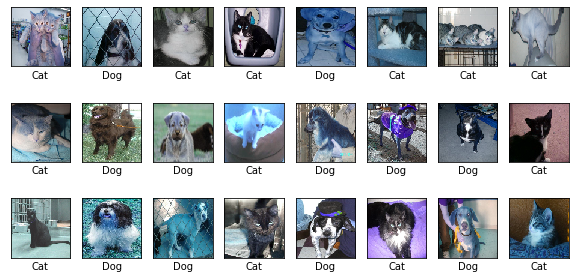

In [18]:
# plot first 24 images from the training dataset
fig = plt.figure(1,figsize=(10,5))
for i in range(24):
    plt.subplot(3,8,i+1)
    image = plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    label =list(CATEGORIES)[y_train[i]]
    plt.xlabel(label, fontsize = 10)
plt.show()

<h3>2.2.feature scaling </h3>
And for the last step of pre processing, we do feature scaling by divide or train and validation set to 255.

In [19]:
# feature scaling
X_train=X_train/255 
X_val=X_val/255 

In [20]:
# use gpu tensorflow
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


<h2>3.Method:</h2>

In [37]:
# Design the model
model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,input_shape=X_train.shape[1:],activation='relu'))

# output layer
model.add(Dense(2,activation='softmax'))

In [38]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x=X_train,y=y_train,validation_data=(X_val, y_val),epochs=5)

In [ ]:
model.fit(X_train,y_train,epochs=5,validation_split=0.1)

<h2>4.Results:</h2>

<h2>5.Conclusion:</h2>